---
Material for the course "Photonics systems and devices"

The following notes written by SERGIO G RODRIGO (2021-2022)</font> 

---

- *Use google colab to see the Notebook index*
- *See classes and functions/methods descriptions calling name_class.__doc__; name_method.__doc__*
- *Notation and equations from "Optical Waveguide Theory", A.W. Snyder and
J. Love Springer, Boston, MA (1983) 1st Ed https://doi.org/10.1007/978-1-4613-2813-1*
- The chapters, pages, figures and tables of Snyder&Love are used to describe optical fiber parameters, field definitions, dispersion relation definitions...

# Description 

+ Plot dispsersion relation either as: $U$ vs $V$, $\omega (eV)$ vs $\beta(\mu m^{-1}$ and $\lambda (nm)$ vs $\beta(\mu m^{-1}$.

+ Two examples are provided: 
 - High index contrast optical fiber ($n_{co}$ >> $n_{cl}$) to compare with Fig. 12-4 Snyder & Love (see fig12-4_Snyder_Love.csv)
 - Weak guidance example ($\Delta \lll 1$) to compare with Fig. 14-4 Snyder & Love (see weak_fig14-4_Snyder_Love.csv)


# Google access

In [ ]:
#Your google drive is made accesible to Colab.
try:
    from google.colab import drive 
    drive.mount('/content/drive/')
    # The working directory
    %cd "/content/drive/MyDrive/optical_fiber"
    %ls -lht 
    # To import own packages set local path in packages syspath
    import sys
    sys.path.insert(0,"./")
except ImportError:
    print("You are not in google.colab!!")    
    pass

# Physics constants


In [ ]:
c0= 299792458.0 #m/s
eps0= 8.854187817e-12    #F·m-1 
mu0= 1.0/(eps0*(c0**2)) #N·A-2
con_wltoeV=1239.828330

# Auxiliary functions for plotting

In [ ]:
from OFiber_plot import plot_dispersion_relation

# Auxiliary functions for finding EM mode solutions

In [ ]:
from OFiber_find import find_EM_modes,\
                        find_EM_modes_loop

# Optical fiber Class (step-profile)

In [ ]:
from OFiber_class import OFiber

### Definition of the OFiber: $n_{co}$,$n_{cl}$, $\Delta$, $\rho$ (high index contrast waveguides)

In [ ]:
'''
Radious has been chosen so the wavelength range of operation 
for both waveguides will be the same. Therefore:
rhow=of.rho*np.sqrt(of.nco**2-of.ncl**2)/np.sqrt(ofw.nco**2-ofw.ncl**2)
print("rho for weakly guinding from high index waveguide",rhow)
'''

'''
High index contrast waveguides
(see Fig. 12-4 Snyder&Love)
'''
rho=0.2 #micras
nco=2.5
delta=0.32  
of=OFiber(rho,nco=nco,delta=delta)
# Dispersion relation V vs U file 
file_name = 'fig12-4_Snyder_Love.csv'      
of.import_dispersion_relation(file_name)
print(of)

rho (microns)= 0.2; nco= 2.5; ncl= 1.5; $\Delta$= 0.32;
 V-U=
           V      HE11  EH11  HE12  HE21  HE31  TE01  TM01
0  1.000000  0.000000   0.0   0.0   0.0   0.0   0.0   0.0
1  1.041414  1.039845   0.0   0.0   0.0   0.0   0.0   0.0
2  1.082828  1.080246   0.0   0.0   0.0   0.0   0.0   0.0
3  1.124242  1.120212   0.0   0.0   0.0   0.0   0.0   0.0
4  1.165657  1.159639   0.0   0.0   0.0   0.0   0.0   0.0


### Definition of the OFiber: $n_{co}$,$n_{cl}$, $\Delta$, $\rho$ (weakly guiding waveguide -->$\Delta \lll 1$)

In [ ]:
'''
Weakly guiding waveguides
(see Fig. 14-4 Snyder&Love)
'''
rho=2.4226 #micras
ncl=1.45
delta=0.0064
ofw=OFiber(rho,ncl=ncl,delta=delta)
# Dispersion relation V vs U file 
file_name = 'weak_fig14-4_Snyder_Love.csv'    
of.import_dispersion_relation(file_name)
print(of)

rho (microns)= 0.2; nco= 2.5; ncl= 1.5; $\Delta$= 0.32;
 V-U=
           V      LP01  LP21  LP02  LP11
0  1.000000  0.000000   0.0   0.0   0.0
1  1.183673  1.123515   0.0   0.0   0.0
2  1.367347  1.244066   0.0   0.0   0.0
3  1.551020  1.344846   0.0   0.0   0.0
4  1.734694  1.429691   0.0   0.0   0.0


#Step-profile optical fiber




## Dispersion relation representations

#### Plot dispersion relation: $U$ vs $V$

Cut-off TE0m,TM0m, U= [ 2.40482556  5.52007811  8.65372791 11.79153444 14.93091771]
Cut-off HE1m (=EH1m),      U= [ 3.83170597  7.01558667 10.17346814 13.32369194 16.47063005]
Cut-off EH0m, U= [ 2.40482556  5.52007811  8.65372791 11.79153444 14.93091771]
Cut-off EH1m, U= [ 3.83170597  7.01558667 10.17346814 13.32369194 16.47063005]
Cut-off EH2m, U= [ 5.1356223   8.41724414 11.61984117 14.79595178 17.95981949]
Cut-off EH3m, U= [ 6.3801619   9.76102313 13.01520072 16.22346616 19.40941523]
Cut-off HEnum (nu>=2) nu=3,      U= [4.39885324 7.42747542]


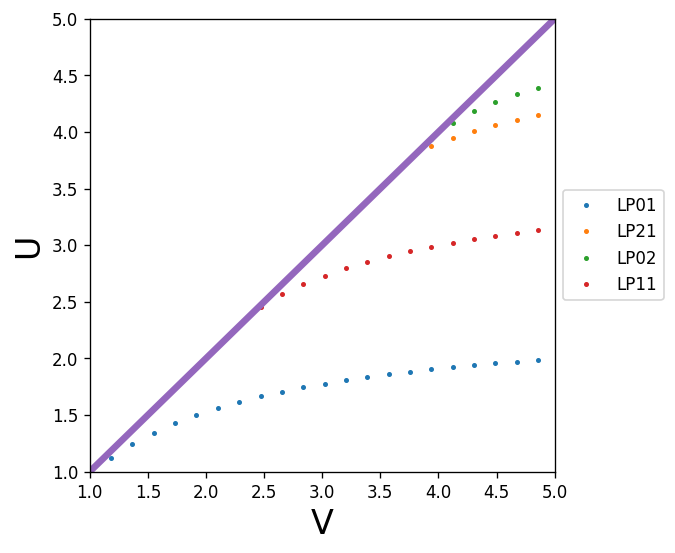

In [ ]:
df=of.dr

# Extract column names used next
col_names=[]
for name, values in df.iteritems():    
    col_names.append(name)
    #print('{name}: {value}'.format(name=name, value=values[0]))

#Remove first column name 'V'
col_names.pop(0)

#Cut-off calculations
fcutoffTETM=of.cutoff_em_modes_exact('TE0m')
cutoffTETM=fcutoffTETM(nt=5)
print("Cut-off TE0m,TM0m, U=",cutoffTETM)
fcutoffHE1m=of.cutoff_em_modes_exact('HE1m')
cutoffHE1m=fcutoffHE1m(nt=5)
print("Cut-off HE1m (=EH1m),      U=",cutoffHE1m)
fcutoffEHnum=of.cutoff_em_modes_exact('EHnum')
for i in range(4):
  print("Cut-off EH"+str(i)+"m, U=",fcutoffEHnum(i,5))

order=3;args=(order,);Uini=0.001;Ufin=9.999;resolution=(Ufin-Uini)/10e3
cutoffHEnum=find_EM_modes(of.cutoff_em_modes_exact('HEnum'),args,Uini,Ufin,resolution,verbose=False) 
print("Cut-off HEnum (nu>=2) nu="+str(order)+",      U=",cutoffHEnum)

# Filter the band to be displayed by column_name (see .csv files)
column_name= None

'''
Dispersion relation V vs U
'''
plot_dispersion_relation(x=df['V'],y=df,col_names=col_names,
                         light_cone_x=df['V'],light_cone_y=[df['V']],
                         column_name=column_name,
                         labelsxy=['V','U'],cutoff=None,xmin=1.0,xmax=5.0,
                         ymin=1.0,ymax=5.0,
                         markersize=2.0,linewidth=0.0) 

#### Database from (U,V) to other representations

In [ ]:
import pandas as pd
from math import pi

# Dataframe k0 vs beta for dispersion relation
df_kbeta=pd.DataFrame()
df_kbeta['k']=of.k_from_V(df['V'])

# Dataframe frequency(omega) vs beta for dispersion relation
df_omegabeta=pd.DataFrame()
df_omegabeta['w']=of.omega_from_V(df['V'])

# Dataframe wavelength vs beta for dispersion relation
df_wlbeta=pd.DataFrame() 
df_wlbeta['wl']=2.0*pi/of.k_from_V(df['V'])

for col_name in col_names:      
  beta=of.beta_from_UV(df_kbeta[['k']].values,df[[col_name]].values,df[['V']].values)
  df_kbeta[col_name]=beta
  df_omegabeta[col_name]=beta
  df_wlbeta[col_name]=beta

#Replace NaN by an arbitrary meaningless number in this context
df_kbeta = df_kbeta.replace(['NaN'],-1.0)
df_omegabeta = df_omegabeta.replace(['NaN'],-1.0)
df_wlbeta = df_wlbeta.replace(['NaN'],-1.0)

#Save to a file
df_omegabeta.to_csv("omegavsbeta"+file_name,sep=';',index=False)
df_wlbeta.to_csv("lambdavsbeta"+file_name,sep=';',index=False)

#### Plot dispersion relation: $\omega (eV)$ vs $\beta(\mu m^{-1}$

          w      HE11      EH11      HE12      HE21      HE31      TE01  \
0  0.493312  6.250000  6.250000  6.250000  6.250000  6.250000  6.250000   
1  0.513742  3.915745  6.508838  6.508838  6.508838  6.508838  6.508838   
2  0.534172  4.077762  6.767677  6.767677  6.767677  6.767677  6.767677   
3  0.554602  4.242647  7.026515  7.026515  7.026515  7.026515  7.026515   
4  0.575032  4.411047  7.285354  7.285354  7.285354  7.285354  7.285354   

       TM01  
0  6.250000  
1  6.508838  
2  6.767677  
3  7.026515  
4  7.285354  


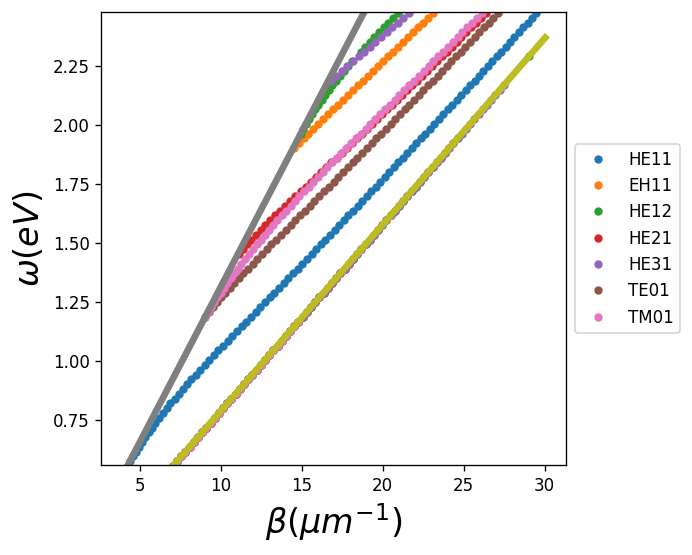

In [ ]:
'''
Dispersion relation frequency (eV) vs beta (microns^-1)
'''
import numpy as np

print(df_omegabeta.head())
beta_min=np.min(df_omegabeta.iloc[:,1:-1].values)
beta_max=np.max(df_omegabeta.iloc[:,1:-1].values)
beta_lc=np.linspace(beta_min,beta_max,df_omegabeta.shape[0])
wc_nco=c0*1e6*beta_lc/of.nco
wc_ncl=c0*1e6*beta_lc/of.ncl
wc_nco=4.1356655385381E-15*wc_nco/(2.0*pi)  # 1Hz->4.13..e-15 eV; 1 rad/s --> 2pi Hz
wc_ncl=4.1356655385381E-15*wc_ncl/(2.0*pi)
plot_dispersion_relation(x=df_omegabeta,y=df_omegabeta['w'].values,col_names=col_names,
                         light_cone_x=beta_lc,light_cone_y=[wc_ncl,wc_nco],
                         column_name=column_name,
                         labelsxy=[r'$\beta (\mu m^{-1})$',r'$\omega (eV)$'],
                         ymin=0.56,ymax=2.48,
                         markersize=4.0,linewidth=0.0)

#### Plot dispersion relation: $\lambda (nm)$ vs $\beta(\mu m^{-1}$

         wl      HE11      EH11      HE12      HE21      HE31      TE01  \
0  2.513274  6.250000  6.250000  6.250000  6.250000  6.250000  6.250000   
1  2.413328  3.915745  6.508838  6.508838  6.508838  6.508838  6.508838   
2  2.321027  4.077762  6.767677  6.767677  6.767677  6.767677  6.767677   
3  2.235527  4.242647  7.026515  7.026515  7.026515  7.026515  7.026515   
4  2.156102  4.411047  7.285354  7.285354  7.285354  7.285354  7.285354   

       TM01  
0  6.250000  
1  6.508838  
2  6.767677  
3  7.026515  
4  7.285354  


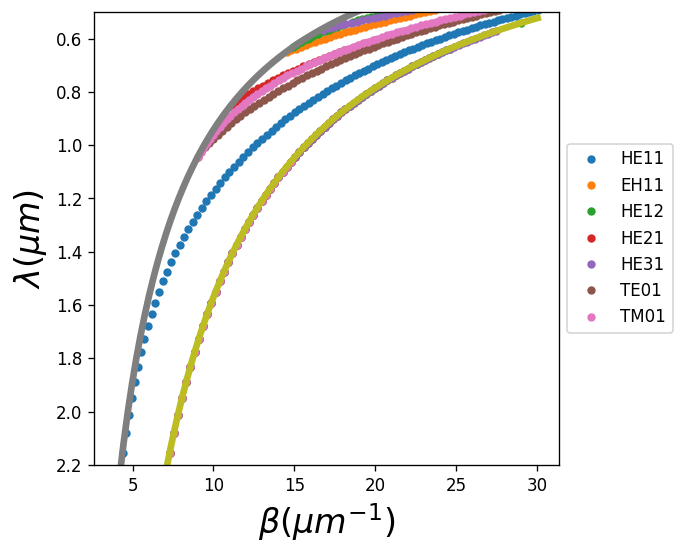

In [ ]:
'''
Dispersion relation wavelength (nm) vs beta (microns^-1)
'''
pd.set_option('display.max_rows',len(df_wlbeta))
print(df_wlbeta.head())
if(column_name!=None):
  print(df_wlbeta[['wl',column_name]])
beta_min=np.min(df_wlbeta.iloc[:,1:-1].values)
beta_max=np.max(df_wlbeta.iloc[:,1:-1].values)
beta_lc=np.linspace(beta_min,beta_max,df_wlbeta.shape[0])
wlc_nco=1e-3*con_wltoeV/wc_nco #microns
wlc_ncl=1e-3*con_wltoeV/wc_ncl #microns
plot_dispersion_relation(x=df_wlbeta,y=df_wlbeta['wl'].values,col_names=col_names,
                         light_cone_x=beta_lc,light_cone_y=[wlc_ncl,wlc_nco],
                         column_name=column_name,
                         labelsxy=[r'$\beta (\mu m^{-1})$',r'$\lambda (\mu m)$'],
                         xmin=None,xmax=None,ymin=0.5,ymax=2.2,invert_yaxis=True)